# Explanatory Notebook

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For random number generation
from random import randint


In [2]:
# Define constants
id_1, id_2, id_3 = 8110, 8000, 7497
random_seed = id_1 + id_2 + id_3

# Set random seed for reproducibility
import random
random.seed(random_seed)

# File paths
data_path = "data.csv"
output_path = "my_data.csv"

# Load data
data = pd.read_csv(data_path)

# Extract columns and target
columns = data.columns.tolist()
target_column = 'smoking'
columns.remove(target_column)

# Select 10 random columns
selected_columns = random.sample(columns, 10)

# Print the selected columns (must be printed)
print("Selected Columns:", selected_columns)

# Add target column to selected columns
selected_columns.append(target_column)

# Create the sample dataframe with selected columns
sample_df = data[selected_columns].copy()

# Save the selected columns as a new CSV file
sample_df.to_csv(output_path, index=False)


Selected Columns: ['fasting blood sugar', 'HDL', 'AST', 'age', 'ALT', 'Urine protein', 'Cholesterol', 'hearing(right)', 'dental caries', 'hearing(left)']


In [3]:
# Load the dataset
df = pd.read_csv('my_data.csv')

# Drop the unwanted column 'Unnamed: 0' if it exists
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

# Display dataset information
print("Dataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   fasting blood sugar  159256 non-null  int64
 1   HDL                  159256 non-null  int64
 2   AST                  159256 non-null  int64
 3   age                  159256 non-null  int64
 4   ALT                  159256 non-null  int64
 5   Urine protein        159256 non-null  int64
 6   Cholesterol          159256 non-null  int64
 7   hearing(right)       159256 non-null  int64
 8   dental caries        159256 non-null  int64
 9   hearing(left)        159256 non-null  int64
 10  smoking              159256 non-null  int64
dtypes: int64(11)
memory usage: 13.4 MB


In [4]:
def summarize_data(df):
    # Display first few rows
    print("\nInitial Rows of Data:")
    print(df.head())

    # Show missing values count for each feature
    print("\nMissing Values Per Feature:")
    print(df.isnull().sum())

    # Display summary statistics for numerical columns
    print("\nStatistical Summary:")
    print(df.describe())
    
    # Display detailed dataframe information
    print("\nDataFrame Information:")
    df.info()

# Call the function to summarize the data
summarize_data(df)



Initial Rows of Data:
   fasting blood sugar  HDL  AST  age  ALT  Urine protein  Cholesterol  \
0                   94   40   22   55   25              1          172   
1                  147   57   27   70   23              1          194   
2                   79   45   27   20   31              1          178   
3                   91   38   20   35   27              1          180   
4                   91   44   19   30   13              1          155   

   hearing(right)  dental caries  hearing(left)  smoking  
0               1              0              1        1  
1               2              1              2        0  
2               1              0              1        1  
3               1              1              1        0  
4               1              0              1        1  

Missing Values Per Feature:
fasting blood sugar    0
HDL                    0
AST                    0
age                    0
ALT                    0
Urine protein          0

In [5]:
def clean_outliers(df, feature):
    # Check if the feature exists in the DataFrame
    if feature not in df.columns:
        print(f"Feature '{feature}' not found in DataFrame, skipping outlier removal.")
        return df

    # Skip outlier removal for binary features
    if df[feature].nunique() == 2:
        print(f"Feature '{feature}' is binary, skipping outlier removal.")
        return df

    # Record the initial count of the feature values
    initial_count = df[feature].count()

    # Calculate the 10th and 90th percentiles to set the lower and upper limits
    lower_limit = df[feature].quantile(0.10)
    upper_limit = df[feature].quantile(0.90)

    # Mask to filter out values within the specified range
    valid_data_mask = (df[feature] >= lower_limit) & (df[feature] <= upper_limit)

    # Apply the mask to filter the DataFrame
    df = df[valid_data_mask]

    # Reset index after removing rows
    df.reset_index(drop=True, inplace=True)

    # Record the final count of the feature values after outlier removal
    final_count = df[feature].count()

    # Output details about the outlier removal process
    print(f"\nOutlier Removal for Feature '{feature}':")
    print(f"Original count: {initial_count}, New count: {final_count}")
    print(f"Outliers removed: {initial_count - final_count}\n")

    return df

# Clean 'ALT' and 'LDL' features if they exist in the DataFrame
df = clean_outliers(df, 'ALT')
df = clean_outliers(df, 'LDL')

# Drop irrelevant columns if they exist
df.drop(columns=['hearing(right)', 'Cholesterol'], errors='ignore', inplace=True)



Outlier Removal for Feature 'ALT':
Original count: 159256, New count: 129436
Outliers removed: 29820

Feature 'LDL' not found in DataFrame, skipping outlier removal.


#### Here you will find the final plots after removing outliers and the features that are not needed 

### boxplot for all features

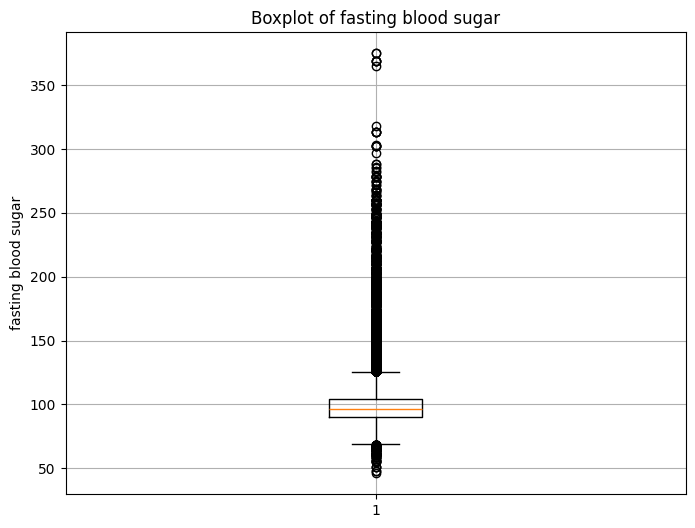

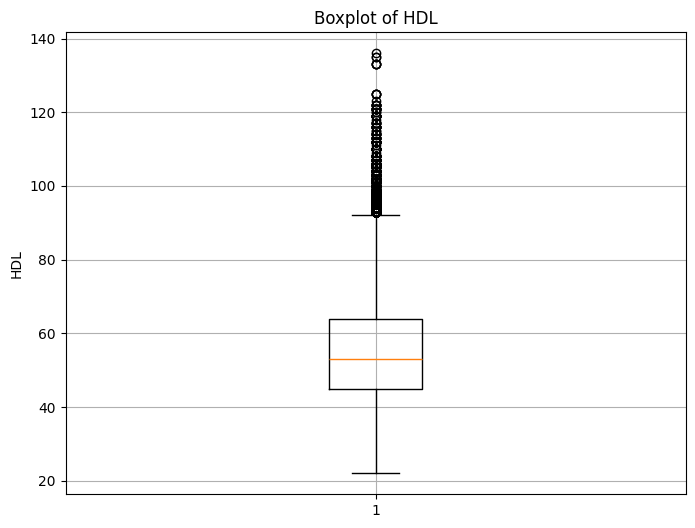

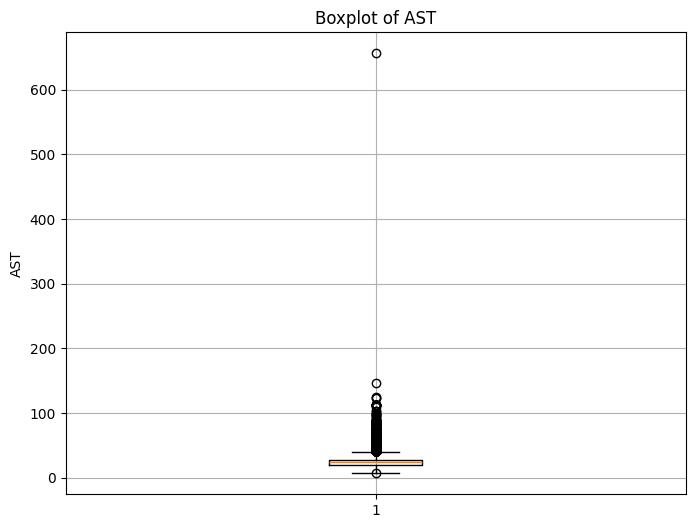

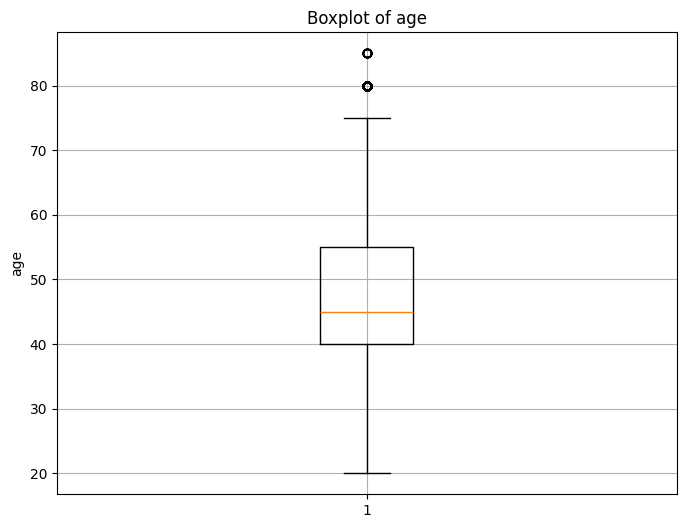

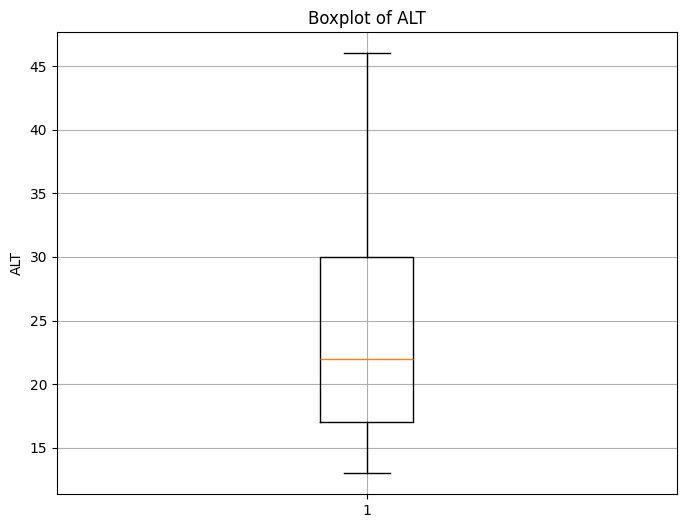

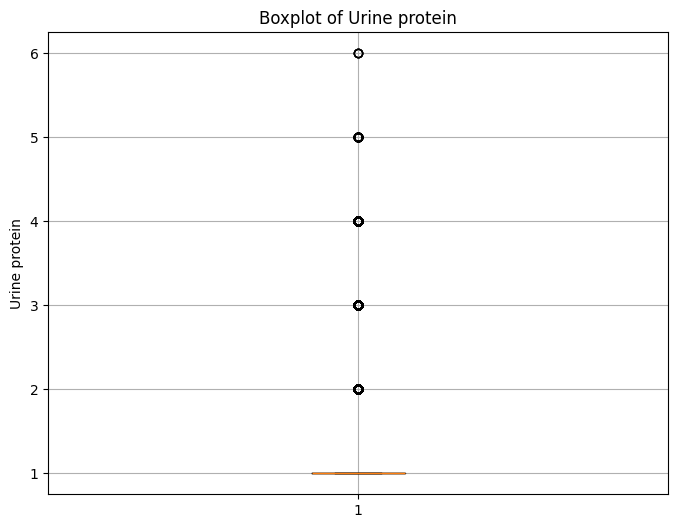

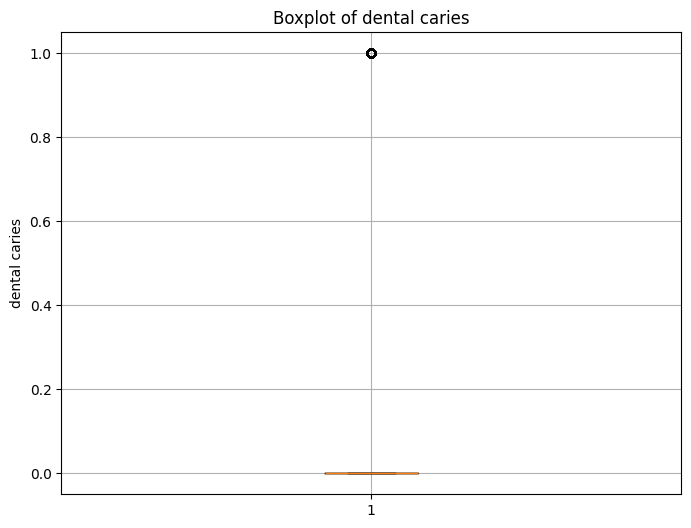

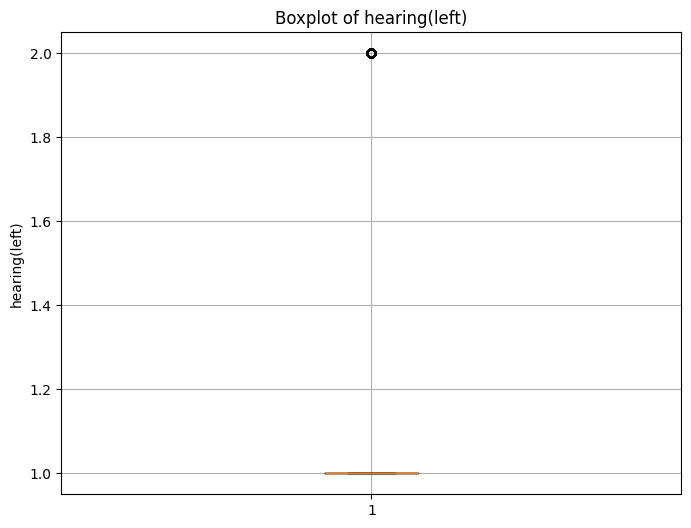

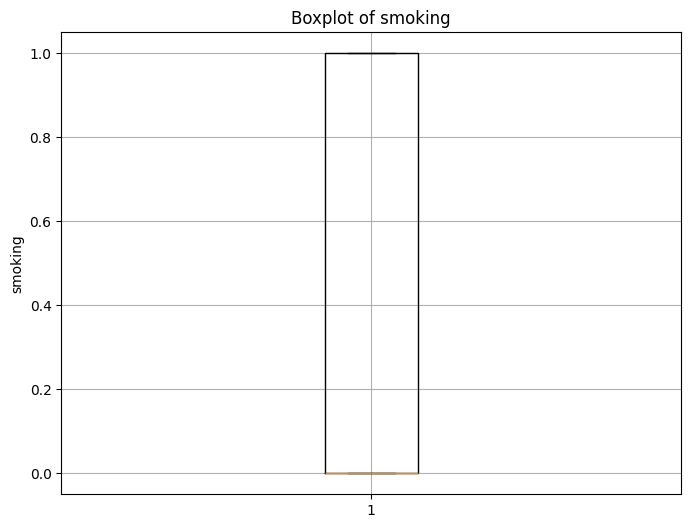

In [6]:
def plot_boxplots(df):
    for feature in df.columns:
        plt.figure(figsize=(8, 6))  # Set the figure size
        plt.boxplot(df[feature])  # Plot the boxplot
        plt.title(f'Boxplot of {feature}')  # Add title
        plt.ylabel(feature)  # Label the y-axis
        plt.grid(True)  # Add grid for better readability
        plt.show()  # Display the plot

# Plot boxplots for all features in the DataFrame
plot_boxplots(df)


### barplot for binary features and histogram for non-binary features

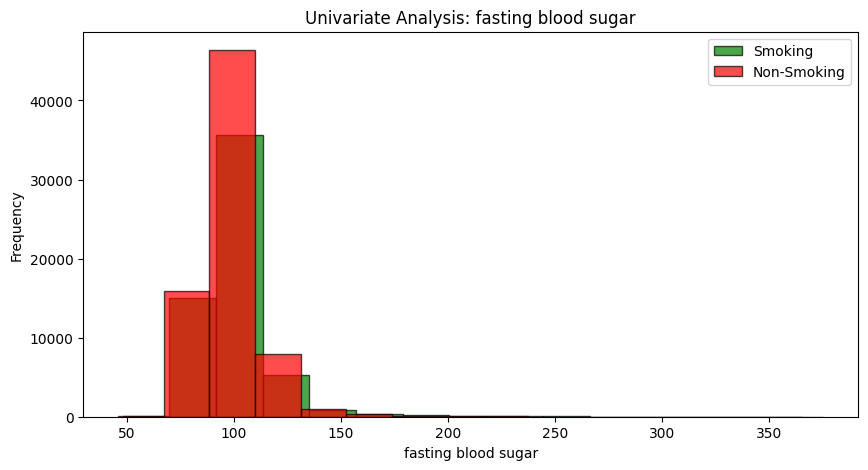

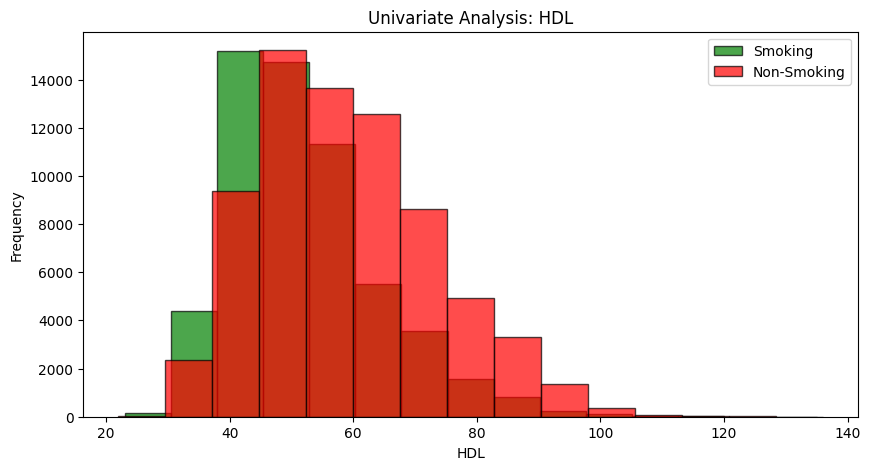

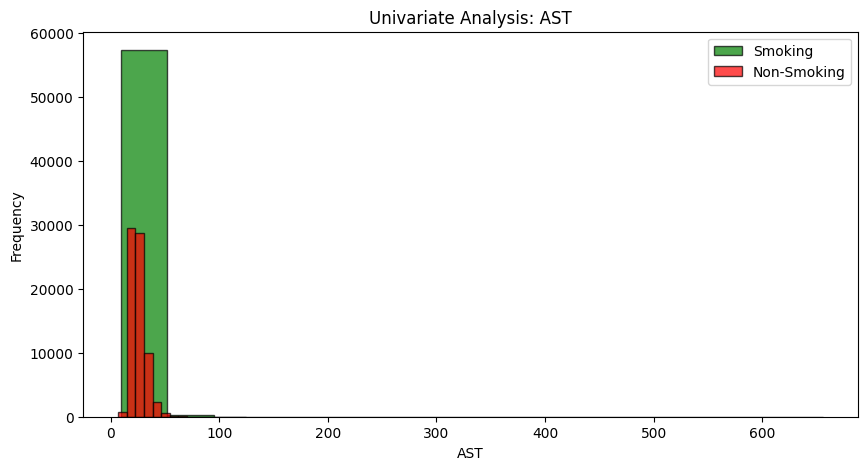

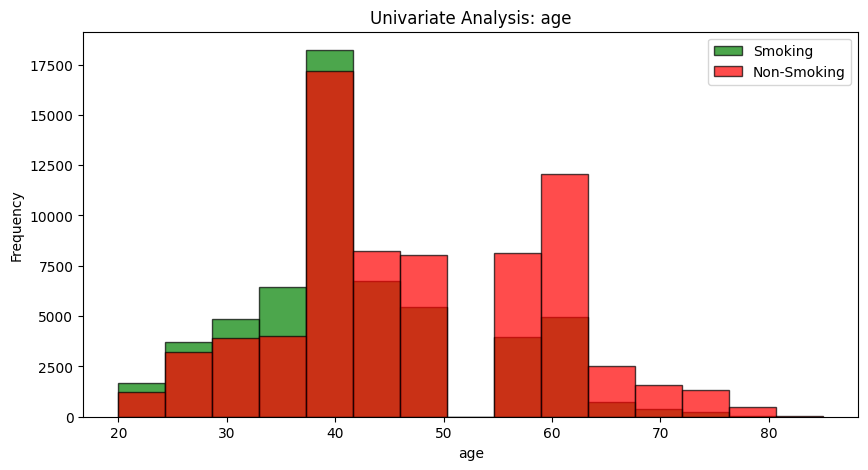

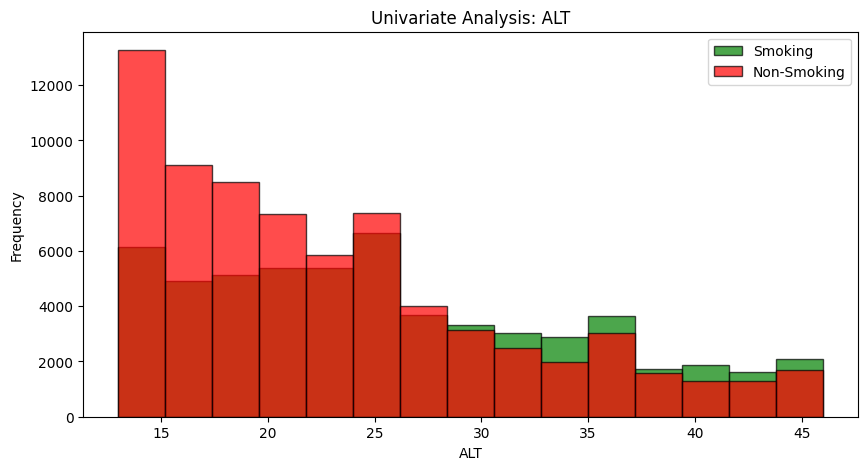

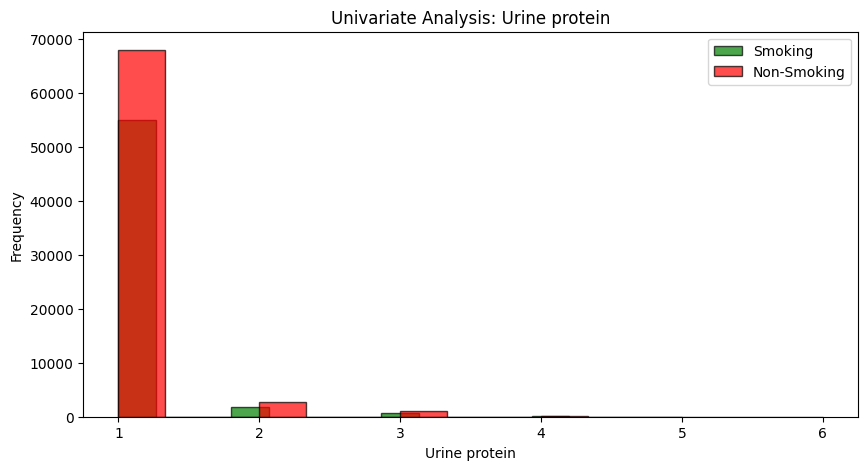

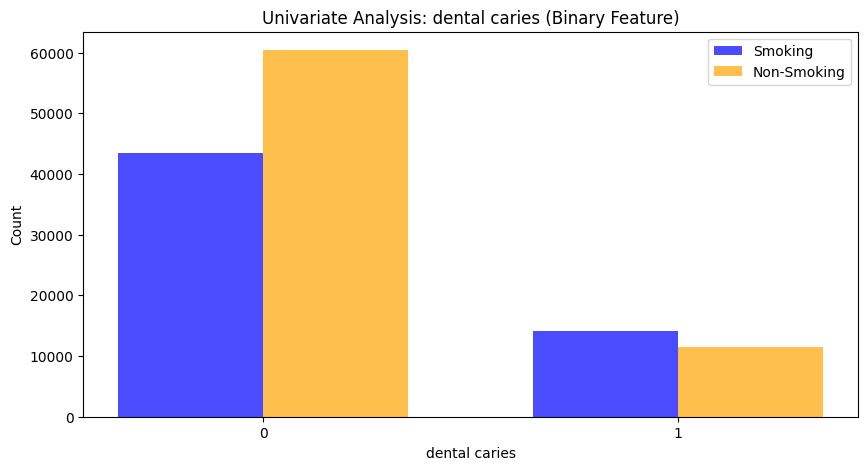

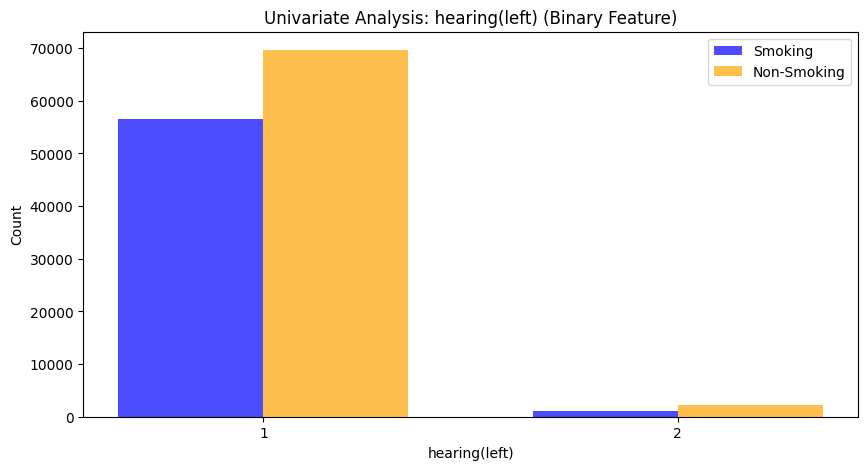

In [7]:
def univariate_analysis(df):
    """Performs univariate analysis on features by smoking status."""
    
    # Separate smoking and non-smoking data
    df_smoking = df[df['smoking'] == 1]
    df_nonsmoking = df[df['smoking'] == 0]
    
    for feature in df.columns:
        if feature == 'smoking':
            continue  # Skip the target variable
        
        unique_values = df[feature].nunique()

        plt.figure(figsize=(10, 5))
        
        if unique_values == 2:  # Binary feature analysis
            # Get the counts for the binary feature in both categories
            smoking_counts = df_smoking[feature].value_counts().sort_index()
            nonsmoking_counts = df_nonsmoking[feature].value_counts().sort_index()
            
            bar_width = 0.35
            indices = np.arange(len(smoking_counts))

            # Plot side-by-side bars for smoking vs. non-smoking
            plt.bar(indices, smoking_counts, bar_width, label='Smoking', alpha=0.7, color='blue')
            plt.bar(indices + bar_width, nonsmoking_counts, bar_width, label='Non-Smoking', alpha=0.7, color='orange')
            
            plt.xticks(indices + bar_width / 2, smoking_counts.index)
            plt.xlabel(feature)
            plt.ylabel('Count')
            plt.title(f"Univariate Analysis: {feature} (Binary Feature)")

        else:  # Continuous feature analysis
            # Plot histograms for continuous features
            plt.hist(df_smoking[feature], bins=15, alpha=0.7, label='Smoking', color='green', edgecolor='black')
            plt.hist(df_nonsmoking[feature], bins=15, alpha=0.7, label='Non-Smoking', color='red', edgecolor='black')
            
            plt.xlabel(feature)
            plt.ylabel('Frequency')
            plt.title(f"Univariate Analysis: {feature}")

        # Display the legend and plot the figure
        plt.legend()
        plt.show()

# Run the univariate analysis
univariate_analysis(df)


### here is the correlation matrix

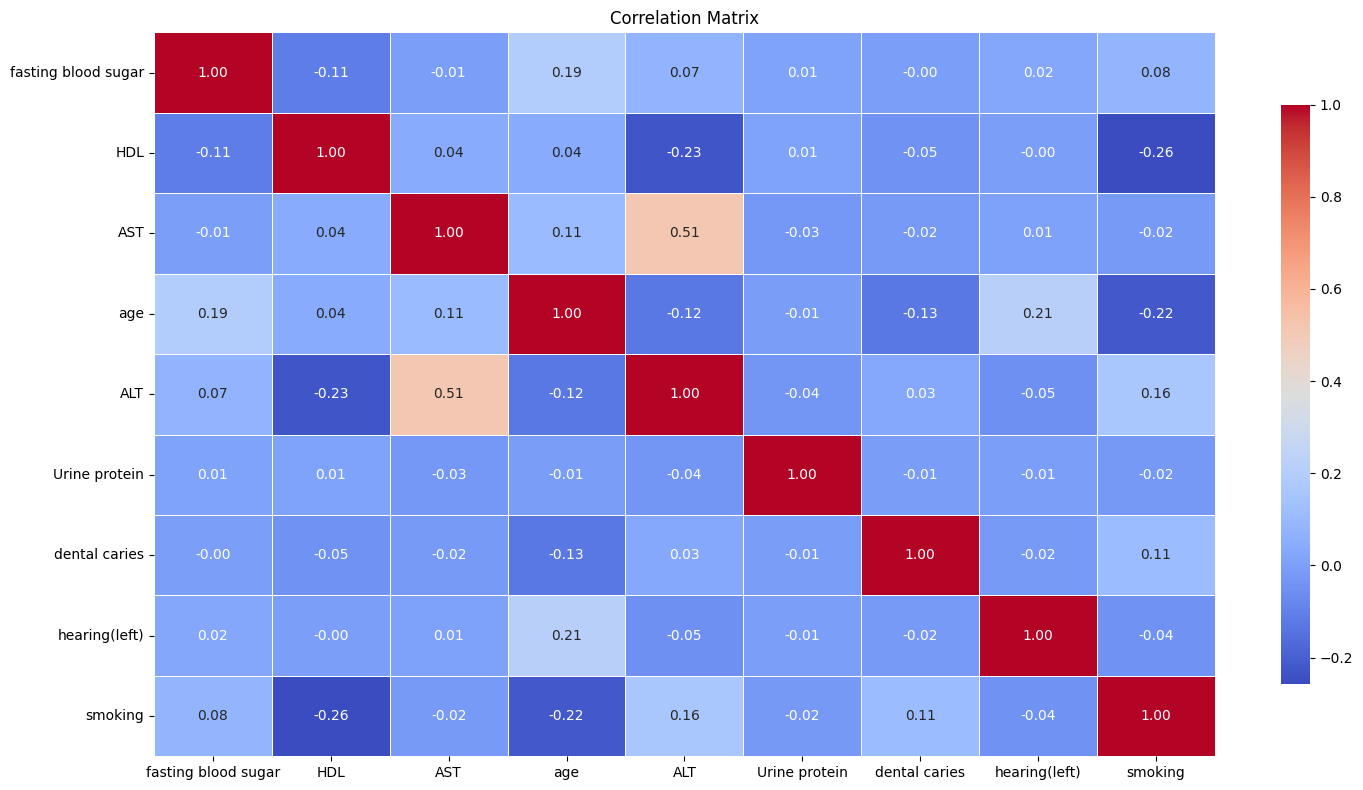

In [8]:
def plot_corr(df):
    """Plots the correlation matrix as a heatmap."""
    
    # Calculate the correlation matrix
    correlation_matrix = df.corr()
    
    # Set up the figure size for better readability
    plt.figure(figsize=(15, 8))
    
    # Create the heatmap with annotation and color map
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8})
    
    # Title and display the plot
    plt.title('Correlation Matrix')
    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

# Run the correlation plot
plot_corr(df)


### Cell 3: Code - Data Loading and Feature Selection
- **Purpose**: Loads the dataset, selects a random subset of features, and saves a new dataset.
- **Content**:
  - Defines constants `id_1`, `id_2`, and `id_3` with values 8110, 8000, and 7497, respectively.
  - Computes a `random_seed` as the sum of these IDs (23607) for reproducibility.
  - Sets the random seed using `random.seed(random_seed)`.
  - Specifies file paths: `data_path = "data.csv"` (input) and `output_path = "my_data.csv"` (output).
  - Loads the dataset from `data.csv` into a pandas DataFrame (`data`).
  - Identifies all columns and the target column (`smoking`).
  - Randomly selects 10 columns (excluding the target) using `random.sample`.
  - Prints the selected columns.
  - Appends the target column (`smoking`) to the selected columns.
  - Creates a new DataFrame (`sample_df`) with the selected columns.
  - Saves `sample_df` to `my_data.csv` without the index.
- **Functionality**: Prepares a subset of the dataset by randomly selecting 10 features plus the target variable, ensuring reproducibility with a fixed seed, and saves the result for further analysis.

### Cell 4: Code - Load and Inspect New Dataset
- **Purpose**: Loads the newly created dataset and displays its structure.
- **Content**:
  - Loads `my_data.csv` into a DataFrame (`df`).
  - Checks for and drops an unwanted column `Unnamed: 0` if present (commonly introduced during CSV operations).
  - Prints dataset information using `df.info()`.
- **Functionality**: Ensures the new dataset is correctly loaded and provides an overview of its structure, including column names, data types, and non-null counts.

### Cell 5: Code - Data Summarization Function
- **Purpose**: Defines and executes a function to summarize the dataset.
- **Content**:
  - Defines `summarize_data(df)` to:
    - Display the first few rows (`df.head()`).
    - Show missing values per feature (`df.isnull().sum()`).
    - Provide summary statistics for numerical columns (`df.describe()`).
    - Display detailed DataFrame information (`df.info()`).
  - Calls `summarize_data(df)` to execute the function.
- **Functionality**: Offers a comprehensive overview of the dataset, including its initial rows, missing values, statistical summaries, and structural details.

### Cell 6: Code - Outlier Removal and Column Dropping
- **Purpose**: Cleans the dataset by removing outliers from specific features and dropping irrelevant columns.
- **Content**:
  - Defines `clean_outliers(df, feature)` to:
    - Check if the feature exists; if not, skip and return the DataFrame.
    - Skip binary features (with exactly two unique values).
    - Calculate the 10th and 90th percentiles as lower and upper limits.
    - Filter rows where the feature values are within these limits.
    - Reset the DataFrame index.
    - Print the number of rows before and after outlier removal, and the number of outliers removed.
  - Applies `clean_outliers` to features `ALT` and `LDL` if they exist.
  - Drops columns `hearing(right)` and `Cholesterol` if they exist, ignoring errors if they are not present.
- **Functionality**: Cleans the dataset by removing extreme values (outliers) from `ALT` and `LDL` based on the 10th and 90th percentiles and removes specified irrelevant columns.

### Cell 7: Markdown - Introduction to Final Plots
- **Purpose**: Introduces the section for final visualizations after data cleaning.
- **Content**: A markdown cell stating, "Here you will find the final plots after removing outliers and the features that are not needed."
- **Functionality**: Provides context for the visualization section, indicating that the following plots reflect the cleaned dataset.

### Cell 8: Markdown - Boxplot Section Header
- **Purpose**: Labels the section for boxplot visualizations.
- **Content**: A markdown cell with the header `### boxplot for all features`.
- **Functionality**: Organizes the notebook by clearly marking the boxplot analysis section.

### Cell 9: Code - Boxplot Visualization
- **Purpose**: Generates boxplots for all features in the DataFrame.
- **Content**:
  - Defines `plot_boxplots(df)` to:
    - Iterate over each feature in the DataFrame.
    - Create a new figure (8x6 inches).
    - Plot a boxplot for the feature using `plt.boxplot`.
    - Set the title, y-axis label, and enable grid lines.
    - Display the plot.
  - Calls `plot_boxplots(df)` to generate the plots.
- **Functionality**: Visualizes the distribution and potential outliers of each feature using boxplots, aiding in understanding the data’s spread and variability.

### Cell 10: Markdown - Barplot and Histogram Section Header
- **Purpose**: Labels the section for barplot and histogram visualizations.
- **Content**: A markdown cell with the header `### barplot for binary features and histogram for non-binary features`.
- **Functionality**: Organizes the notebook by marking the section for univariate analysis visualizations.

### Cell 11: Code - Univariate Analysis
- **Purpose**: Performs univariate analysis by plotting barplots for binary features and histograms for non-binary features, comparing smoking and non-smoking groups.
- **Content**:
  - Defines `univariate_analysis(df)` to:
    - Split the DataFrame into smoking (`smoking == 1`) and non-smoking (`smoking == 0`) subsets.
    - Iterate over each feature, skipping the target (`smoking`).
    - For binary features (exactly two unique values):
      - Compute value counts for smoking and non-smoking groups.
      - Plot side-by-side barplots with smoking (blue) and non-smoking (orange) counts.
      - Set labels, title, and legend.
    - For non-binary (continuous) features:
      - Plot histograms for smoking (green) and non-smoking (red) groups with 15 bins.
      - Set labels, title, and legend.
    - Display each plot.
  - Calls `univariate_analysis(df)` to generate the plots.
- **Functionality**: Provides insights into how each feature’s distribution differs between smoking and non-smoking groups, using appropriate visualizations for binary and continuous features.

### Cell 12: Markdown - Correlation Matrix Section Header
- **Purpose**: Labels the section for the correlation matrix visualization.
- **Content**: A markdown cell with the header `### here is the correlation matrix`.
- **Functionality**: Organizes the notebook by marking the section for correlation analysis.

### Cell 13: Code - Correlation Matrix Heatmap
- **Purpose**: Generates a heatmap of the correlation matrix for the DataFrame.
- **Content**:
  - Defines `plot_corr(df)` to:
    - Compute the correlation matrix using `df.corr()`.
    - Create a figure (15x8 inches).
    - Plot a heatmap using `sns.heatmap` with annotations, `coolwarm` colormap, and formatted values (two decimal places).
    - Set the title and adjust layout.
    - Display the plot.
  - Calls `plot_corr(df)` to generate the heatmap.
- **Functionality**: Visualizes the pairwise correlations between features, helping identify relationships and potential multicollinearity in the dataset.

---

## Summary
The notebook systematically processes a dataset to analyze smoking behavior:
1. **Setup**: Imports libraries and loads the dataset, selecting a random subset of 10 features plus the target (`smoking`).
2. **Data Preparation**: Saves the subset, reloads it, and inspects its structure.
3. **Data Cleaning**: Removes outliers from `ALT` and `LDL` and drops irrelevant columns (`hearing(right)`, `Cholesterol`).
4. **Exploratory Data Analysis (EDA)**:
   - Summarizes the dataset with head, missing values, statistics, and info.
   - Visualizes feature distributions with boxplots.
   - Compares smoking vs. non-smoking groups with barplots (binary) and histograms (continuous).
   - Displays feature correlations with a heatmap.
5. **Output**: Produces a cleaned dataset (`my_data.csv`) and multiple visualizations for insights.

The notebook is well-structured, with clear functions for modularity and reproducibility ensured by a fixed random seed. It effectively prepares and analyzes the dataset for further modeling or interpretation, focusing on the relationship between features and smoking status.

---
